In [138]:
import sys

from keras.models import Sequential
from keras.layers import InputLayer, Dense
import pandas as pd
import numpy as np

In [139]:
#Importing data
x_train = pd.read_csv('../pre-processamento-e-transformacao/X_TRAIN.csv')
x_test = pd.read_csv('../pre-processamento-e-transformacao/X_TEST.csv')
y_train = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN.csv')
y_test = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST.csv')
# y_train_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN_LOG.csv')
# y_test_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST_LOG.csv')

In [140]:
# Transforming target variable
# y_train = np.expm1((y_train + abs(y_train.min())) / 10000)
# y_test = np.expm1((y_test + abs(y_test.min())) / 10000)

In [141]:
# Normalizar
# from sklearn.preprocessing import MinMaxScaler
#
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test  = scaler.transform(x_test)


In [142]:
# Creating model
input_neuron, hidden_neuron, output_neuron = np.size(x_train, 1), 3, 1

mlp = Sequential([
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron)
])

In [143]:
# Summary representation
mlp.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 3)                 867       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 4         
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Compiling model
mlp.compile(optimizer="adam", loss="mse")

In [145]:
# Training the model
batch_size = 16

Log = mlp.fit(x_train, y_train, batch_size=batch_size, epochs=50)

Epoch 1/50
64/64 [==============================] - 0s 576us/step - loss: 38927773696.0000
Epoch 2/50
64/64 [==============================] - 0s 562us/step - loss: 38729347072.0000
Epoch 3/50
64/64 [==============================] - 0s 535us/step - loss: 38379065344.0000
Epoch 4/50
64/64 [==============================] - 0s 545us/step - loss: 37828235264.0000
Epoch 5/50
64/64 [==============================] - 0s 597us/step - loss: 37090807808.0000
Epoch 6/50
64/64 [==============================] - 0s 539us/step - loss: 36183801856.0000
Epoch 7/50
64/64 [==============================] 

## Medidas Desempenho

* **r2_score**(y_test, y_pred)

* **Gráfico de Dispersão**

* **median_absolute_error**(y_test, y_pred)


(0.0, 300000.0)

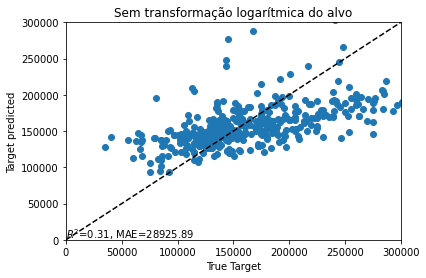

In [146]:
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

y_pred = mlp.predict(x_test)

# print(y_test)
# print(y_pred)

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test, y_pred)
ax0.plot([0, 300000], [0, 300000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 300000])
ax0.set_ylim([0, 300000])


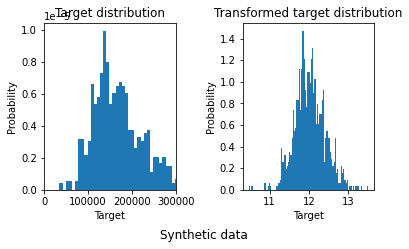

In [147]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


## Y log

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 300000])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_train_log, bins=100, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.06, x=0.53)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


Epoch 1/50
64/64 [==============================] - 0s 907us/step - loss: 29164150784.0000
Epoch 2/50
64/64 [==============================] - 0s 871us/step - loss: 23802109952.0000
Epoch 3/50
64/64 [==============================] - 0s 866us/step - loss: 20079896576.0000
Epoch 4/50
64/64 [==============================] - 0s 845us/step - loss: 17317193728.0000
Epoch 5/50
64/64 [==============================] - 0s 1ms/step - loss: 1514

(0.0, 2000.0)

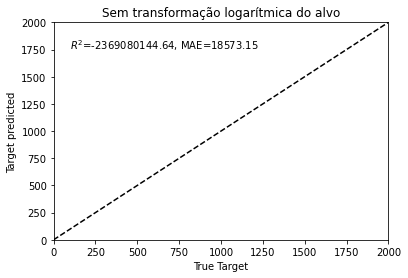

In [148]:
## Predicting with y log

Log = mlp.fit(x_train, y_train_log, batch_size=batch_size, epochs=50)

# y_pred = np.expm1(mlp.predict(x_test))
y_pred = mlp.predict(x_test)



r2 = r2_score(y_test_log, y_pred)

mae = median_absolute_error(y_test_log, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test_log, y_pred)
ax0.plot([0, 2000], [0, 2000], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(100, 1750, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 2000])
ax0.set_ylim([0, 2000])